Рекомендуемая скорость: 60.00 км/ч
Категория: Medium


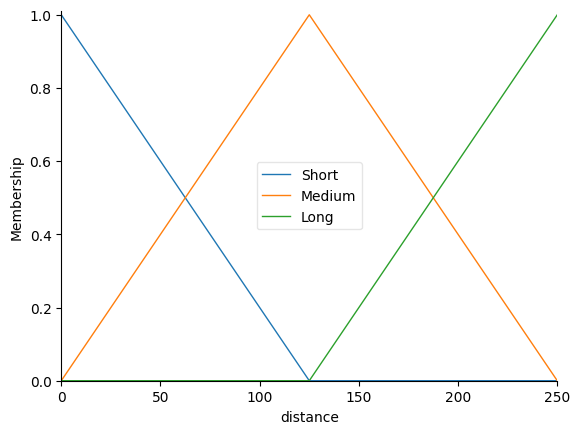

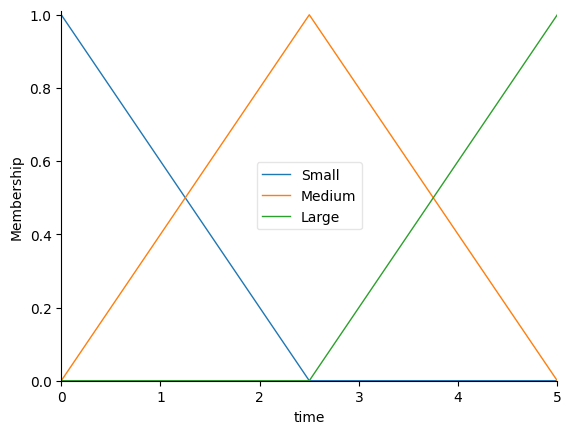

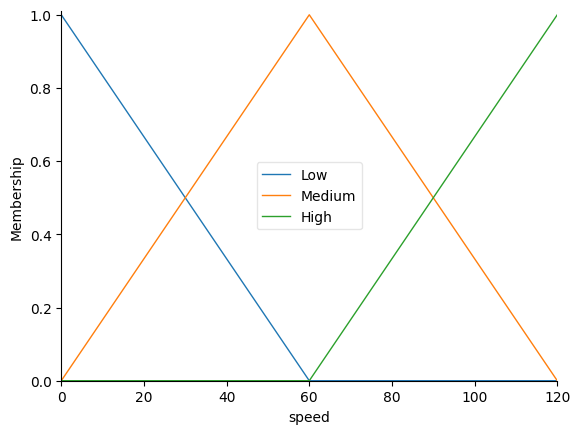

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Универсумы для переменных
distance_universe = np.arange(0, 251, 1)
time_universe = np.arange(0, 5.1, 0.1)
speed_universe = np.arange(0, 121, 1)

# Нечеткие переменные
distance = ctrl.Antecedent(distance_universe, 'distance')
time = ctrl.Antecedent(time_universe, 'time')
speed = ctrl.Consequent(speed_universe, 'speed')

# Функции принадлежности для расстояния
distance['Short'] = fuzz.trimf(distance.universe, [0, 0, 125])
distance['Medium'] = fuzz.trimf(distance.universe, [0, 125, 250])
distance['Long'] = fuzz.trimf(distance.universe, [125, 250, 250])

# Функции принадлежности для времени
time['Small'] = fuzz.trimf(time.universe, [0, 0, 2.5])
time['Medium'] = fuzz.trimf(time.universe, [0, 2.5, 5])
time['Large'] = fuzz.trimf(time.universe, [2.5, 5, 5])

# Функции принадлежности для скорости
speed['Low'] = fuzz.trimf(speed.universe, [0, 0, 60])
speed['Medium'] = fuzz.trimf(speed.universe, [0, 60, 120])
speed['High'] = fuzz.trimf(speed.universe, [60, 120, 120])

# База правил
rules = [
    ctrl.Rule(distance['Short'] & time['Large'], speed['Low']),
    ctrl.Rule(distance['Short'] & time['Medium'], speed['Low']),
    ctrl.Rule(distance['Short'] & time['Small'], speed['Medium']),
    ctrl.Rule(distance['Medium'] & time['Large'], speed['Low']),
    ctrl.Rule(distance['Medium'] & time['Medium'], speed['Medium']),
    ctrl.Rule(distance['Medium'] & time['Small'], speed['High']),
    ctrl.Rule(distance['Long'] & time['Large'], speed['Medium']),
    ctrl.Rule(distance['Long'] & time['Medium'], speed['High']),
    ctrl.Rule(distance['Long'] & time['Small'], speed['High']),
]

# Система управления
speed_ctrl = ctrl.ControlSystem(rules)
speed_sim = ctrl.ControlSystemSimulation(speed_ctrl)

# Входные значения
speed_sim.input['distance'] = 200
speed_sim.input['time'] = 4

# Расчет скорости
speed_sim.compute()

# Определение категории скорости
speed_value = speed_sim.output['speed']
low_membership = fuzz.interp_membership(speed_universe, speed['Low'].mf, speed_value)
medium_membership = fuzz.interp_membership(speed_universe, speed['Medium'].mf, speed_value)
high_membership = fuzz.interp_membership(speed_universe, speed['High'].mf, speed_value)

category = np.argmax([low_membership, medium_membership, high_membership])
categories = ['Low', 'Medium', 'High']

# Результат
print(f"Рекомендуемая скорость: {speed_sim.output['speed']:.2f} км/ч")
print(f"Категория: {categories[category]}")

# Визуализация функций принадлежности
distance.view()
time.view()
speed.view()
plt.show()